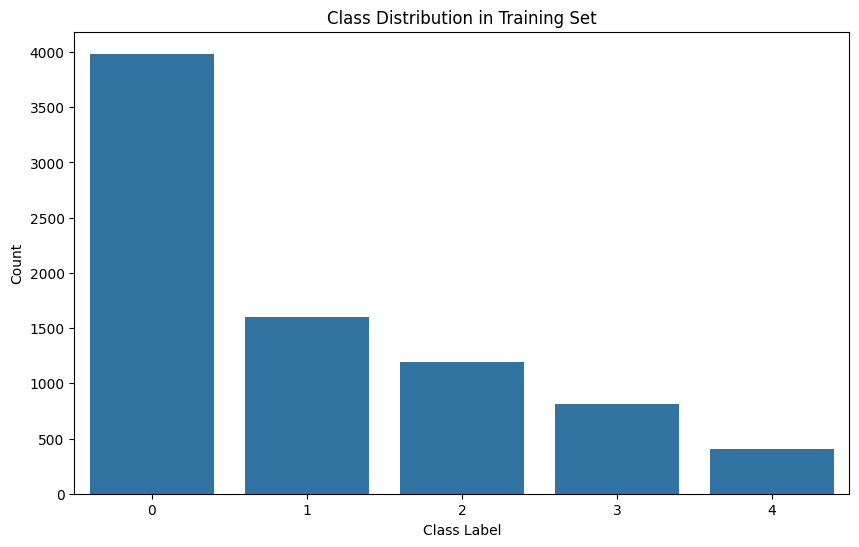

Label
0    3985
1    1604
2    1196
3     809
4     406
Name: count, dtype: int64
--- Train Set ---
Total examples: 8000
Batch Features shape: torch.Size([32, 206])
Batch Labels shape:   torch.Size([32])

--- Test Set ---
Total examples: 2000
Batch Features shape: torch.Size([32, 205])
Batch Labels shape:   torch.Size([32])



In [ ]:
# --- Imports ---
import torch
import pandas as pd
import numpy as np
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import seaborn as sns

# --- Dataset Definition ---
class CSVDataset(Dataset):
    """
    Custom PyTorch Dataset for loading tabular data from CSV files.
    """
    def __init__(self, csv_file_path):
        # Load data using pandas
        self.df = pd.read_csv(csv_file_path)

        # Separate features (float32) and labels (long/int64)
        # Assuming the last column is the target label
        self.features = torch.from_numpy(self.df.iloc[:, :-1].values).float()
        self.labels = torch.from_numpy(self.df.iloc[:, -1].values).long()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# --- Data Initialization ---
# Define file paths (Use absolute paths for reliability)
train_path = '/Users/edmundtsou/Desktop/JHU Files/Sophomore/Neural Networks from Scratch/Neural-Network-from-Scratch-Mystery-Project/Data/train.csv'
test_path = '/Users/edmundtsou/Desktop/JHU Files/Sophomore/Neural Networks from Scratch/Neural-Network-from-Scratch-Mystery-Project/Data/test.csv'

train_dataset = CSVDataset(train_path)
test_dataset = CSVDataset(test_path)

# --- Class Distribution Analysis ---
# Check for class imbalance which strongly affects model performance
train_labels = [label.item() for _, label in train_dataset]
df_labels = pd.DataFrame(train_labels, columns=['Label'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_labels, x='Label')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()

print("Exact Class Counts:", df_labels['Label'].value_counts().sort_index())

# --- DataLoader Setup ---
# Batch size of 32 is a standard starting point for tabular data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Verify data shapes
for loader_name, loader in [("Train", train_loader), ("Test", test_loader)]:
    print(f"--- {loader_name} Set ---")
    print(f"Total examples: {len(loader.dataset)}")
    
    # Inspect first batch
    for features, labels in loader:
        print(f"Batch Features shape: {features.shape}")
        print(f"Batch Labels shape:   {labels.shape}")
        break 
    print()

Model 1: MLP with Focal Loss
Model 2: MLP with Class-Weighted Cross-Entropy


### Methodology & Architecture
- **Architecture:** Multi-Layer Perceptron (MLP).
  - Layers: Input -> [Linear -> BatchNorm -> ReLU -> Dropout] blocks -> Output.
  - Hidden Layers: (512, 256)

**Hyperparameters:**
- Learning Rate: `1e-3`
- Weight Decay: `1e-4`
- Dropout: `0.35`
- Epochs: `40`
- Batch Size: `128`
- Cross-Validation: `5`-fold Stratified

**Methodology:**
- Data Scaling: `StandardScaler` fitted on training folds.
- Loss Function: **Focal Loss** (gamma=2.0) vs **Class-Weighted Cross-Entropy**.


=== Fold 1/5 | loss=ce ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.934     0.940     0.937       797
           1      0.826     0.916     0.869       321
           2      0.865     0.858     0.861       239
           3      0.784     0.677     0.727       161
           4      0.667     0.537     0.595        82

    accuracy                          0.876      1600
   macro avg      0.815     0.785     0.798      1600
weighted avg      0.873     0.876     0.873      1600


=== Fold 2/5 | loss=ce ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.925     0.946     0.935       797
           1      0.897     0.891     0.894       321
           2      0.817     0.820     0.818       239
           3      0.868     0.772     0.817       162
           4      0.610     0.617     0.613        81

    accuracy                          0.882    

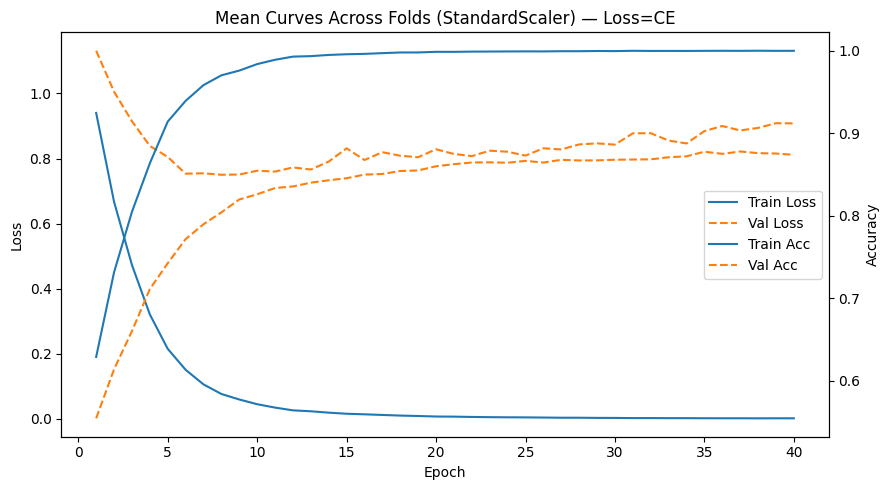


=== Cross-validated performance (StandardScaler, loss=ce) ===
              precision    recall  f1-score   support

           0      0.932     0.934     0.933      3985
           1      0.854     0.884     0.869      1604
           2      0.816     0.849     0.832      1196
           3      0.798     0.748     0.772       809
           4      0.668     0.569     0.614       406

    accuracy                          0.874      8000
   macro avg      0.814     0.797     0.804      8000
weighted avg      0.872     0.874     0.873      8000



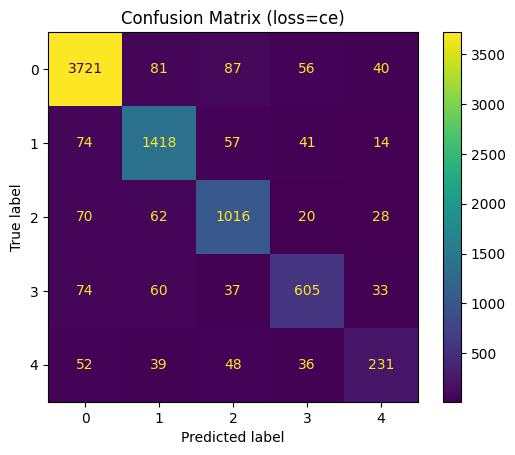


=== Fold 1/5 | loss=focal ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.920     0.942     0.931       797
           1      0.858     0.882     0.869       321
           2      0.866     0.841     0.854       239
           3      0.776     0.708     0.740       161
           4      0.653     0.598     0.624        82

    accuracy                          0.874      1600
   macro avg      0.815     0.794     0.804      1600
weighted avg      0.871     0.874     0.872      1600


=== Fold 2/5 | loss=focal ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.932     0.932     0.932       797
           1      0.887     0.882     0.884       321
           2      0.846     0.828     0.837       239
           3      0.818     0.802     0.810       162
           4      0.604     0.679     0.640        81

    accuracy                          0.8

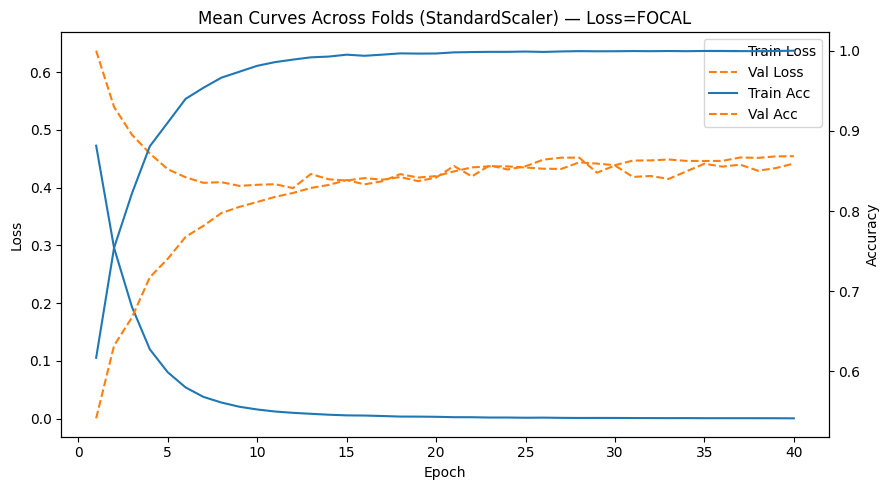


=== Cross-validated performance (StandardScaler, loss=focal) ===
              precision    recall  f1-score   support

           0      0.926     0.930     0.928      3985
           1      0.858     0.880     0.869      1604
           2      0.827     0.823     0.825      1196
           3      0.756     0.754     0.755       809
           4      0.660     0.574     0.614       406

    accuracy                          0.868      8000
   macro avg      0.805     0.792     0.798      8000
weighted avg      0.867     0.868     0.867      8000



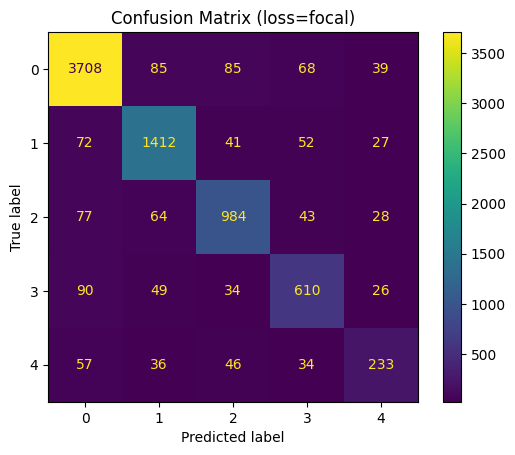

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
)
import matplotlib.pyplot as plt

# --- Model Architecture ---
class MLP(nn.Module):
    """
    Multi-Layer Perceptron (MLP) for classification.
    Architecture: Input -> [Linear -> BatchNorm -> ReLU -> Dropout] x N -> Output
    """
    def __init__(self, in_dim, num_classes, hidden=(512, 256), dropout=0.35):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [
                nn.Linear(prev, h),
                nn.BatchNorm1d(h), # Normalize activations for stability
                nn.ReLU(),
                nn.Dropout(dropout), # Regularization
            ]
            prev = h
        layers += [nn.Linear(prev, num_classes)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# --- Helper Classes & Functions ---

class NumpyTabularDataset(Dataset):
    """Dataset wrapper for numpy arrays to work with PyTorch DataLoaders."""
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def compute_class_weights(y, K, device):
    """
    Compute inverse class weights to handle class imbalance.
    Formula: N / (K * count_k)
    """
    counts = np.bincount(y, minlength=K)
    weights = counts.sum() / (K * np.maximum(counts, 1))
    return torch.tensor(weights, dtype=torch.float32, device=device), counts

def materialize_numpy(dataset, indices):
    """
    Extracts data from a subset of a PyTorch Dataset into NumPy arrays.
    Required for sklearn's StandardScaler which operates on arrays.
    """
    Xs, ys = [], []
    for i in indices:
        x, y = dataset[i]
        
        # Handle tensor vs numpy
        if torch.is_tensor(x):
            if x.ndim > 1: x = x.view(-1)
            Xs.append(x.detach().cpu().numpy())
        else:
            Xs.append(np.asarray(x).reshape(-1))

        ys.append(int(y.item()) if torch.is_tensor(y) else int(y))

    return np.stack(Xs), np.array(ys, dtype=np.int64)

@torch.no_grad()
def predict_loader(model, loader, device="cpu"):
    """Generates argmax predictions for an entire DataLoader."""
    model.eval()
    y_true, y_pred = [], []
    for x, y in loader:
        x = x.to(device)
        logits = model(x)
        pred = torch.argmax(logits, dim=1).detach().cpu().numpy()
        y_pred.append(pred)
        y_true.append(y.numpy())
    return np.concatenate(y_true), np.concatenate(y_pred)

def compute_loss_batch(logits, y, loss_fn_name, class_w, focal_gamma=2.0):
    """Selected Loss Function (Cross-Entropy vs Focal Loss)."""
    if loss_fn_name == "ce":
        return F.cross_entropy(logits, y, weight=class_w)
    elif loss_fn_name == "focal":
        # Focal Loss: Focuses training on hard-to-classify examples
        ce = F.cross_entropy(logits, y, weight=class_w, reduction="none")  
        p = torch.softmax(logits, dim=1).gather(1, y.view(-1, 1)).squeeze(1).clamp(1e-6, 1.0)
        return ((1.0 - p) ** focal_gamma * ce).mean()
    raise ValueError(f"Unknown loss_fn_name: {loss_fn_name}")

@torch.no_grad()
def eval_loss_and_acc(model, loader, device, loss_fn_name, class_w, focal_gamma=2.0):
    """Computes mean loss and accuracy on validation data."""
    model.eval()
    total_loss, total_n = 0.0, 0
    all_true, all_pred = [], []

    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)

        if loss_fn_name == "ce":
            loss_sum = F.cross_entropy(logits, y, weight=class_w, reduction="sum")
        else:
            ce = F.cross_entropy(logits, y, weight=class_w, reduction="none")
            p = torch.softmax(logits, dim=1).gather(1, y.view(-1, 1)).squeeze(1).clamp(1e-6, 1.0)
            loss_sum = ((1.0 - p) ** focal_gamma * ce).sum()

        total_loss += float(loss_sum.item())
        total_n += int(y.numel())

        pred = torch.argmax(logits, dim=1)
        all_pred.append(pred.detach().cpu().numpy())
        all_true.append(y.detach().cpu().numpy())

    y_true = np.concatenate(all_true)
    y_pred = np.concatenate(all_pred)
    
    acc = accuracy_score(y_true, y_pred) if total_n > 0 else 0.0
    mean_loss = total_loss / max(total_n, 1)
    
    return mean_loss, acc

def plot_mean_curves_across_folds(histories, loss_name):
    """Plots training/validation curves averaged across folds."""
    train_loss = np.stack([h["train_loss"] for h in histories]).mean(axis=0)
    val_loss   = np.stack([h["val_loss"]   for h in histories]).mean(axis=0)
    train_acc  = np.stack([h["train_acc"]  for h in histories]).mean(axis=0)
    val_acc    = np.stack([h["val_acc"]    for h in histories]).mean(axis=0)

    epochs = np.arange(1, len(train_loss) + 1)

    fig, ax1 = plt.subplots(figsize=(9, 5))
    ax2 = ax1.twinx()

    ax1.plot(epochs, train_loss, label="Train Loss", linestyle="-", color='tab:blue')
    ax1.plot(epochs, val_loss, label="Val Loss", linestyle="--", color='tab:orange')
    ax1.set_ylabel("Loss")
    ax1.set_xlabel("Epoch")

    ax2.plot(epochs, train_acc, label="Train Acc", linestyle="-", color='tab:green')
    ax2.plot(epochs, val_acc, label="Val Acc", linestyle="--", color='tab:red')
    ax2.set_ylabel("Accuracy")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="best")

    plt.title(f"Mean Curves (5-Fold) — {loss_name.upper()}")
    plt.tight_layout()
    plt.show()

def train_one_fold(
    train_loader, val_loader, in_dim, K, class_w,
    device="cpu", hidden=(512, 256), dropout=0.35,
    lr=1e-3, weight_decay=1e-4, epochs=40,
    loss_fn_name="ce", focal_gamma=2.0,
):
    """Training loop for a single CV fold."""
    model = MLP(in_dim, K, hidden=hidden, dropout=dropout).to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    for ep in range(1, epochs + 1):
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)

            logits = model(x)
            loss = compute_loss_batch(logits, y, loss_fn_name, class_w, focal_gamma)

            opt.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # Prevent exploding gradients
            opt.step()

        tr_loss, tr_acc = eval_loss_and_acc(model, train_loader, device, loss_fn_name, class_w, focal_gamma)
        va_loss, va_acc = eval_loss_and_acc(model, val_loader, device, loss_fn_name, class_w, focal_gamma)

        history["train_loss"].append(tr_loss)
        history["train_acc"].append(tr_acc)
        history["val_loss"].append(va_loss)
        history["val_acc"].append(va_acc)

    return model, history

def cross_validate_mlp_standardscaler(
    dataset,
    n_splits=5,
    batch_size=128,
    device=None,
    random_state=0,
    epochs=40,
    loss_fn_name="ce",    
    focal_gamma=2.0,
    hidden=(512, 256),
    dropout=0.35,
    lr=1e-3,
    weight_decay=1e-4,
):
    """
    Executes Stratified 5-Fold Cross Validation.
    Scales features independently for each fold to strict data leakage prevention.
    """
    if device is None:
        device = "mps" if torch.backends.mps.is_available() else "cpu"

    N = len(dataset)
    indices = np.arange(N)
    y_all = np.array([int(dataset[i][1]) for i in indices], dtype=np.int64)
    K = int(y_all.max()) + 1

    x0, _ = dataset[0]
    in_dim = int(np.prod(x0.shape if torch.is_tensor(x0) else np.asarray(x0).shape))

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    all_true, all_pred = [], []
    all_histories = []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(indices, y_all), 1):
        print(f"=== Fold {fold}/{n_splits} | loss={loss_fn_name} ===")

        # Data Split
        X_tr, y_tr = materialize_numpy(dataset, tr_idx)
        X_va, y_va = materialize_numpy(dataset, va_idx)

        # Standard Scaling (Fit on Train, Transform on Train & Val)
        scaler = StandardScaler().fit(X_tr)   
        X_tr = scaler.transform(X_tr)
        X_va = scaler.transform(X_va)

        train_ds = NumpyTabularDataset(X_tr, y_tr)
        val_ds = NumpyTabularDataset(X_va, y_va)

        # Shuffle only training
        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

        class_w, counts = compute_class_weights(y_tr, K, device)
        print("Class counts:", counts)

        model, history = train_one_fold(
            train_loader=train_loader,
            val_loader=val_loader,
            in_dim=in_dim,
            K=K,
            class_w=class_w,
            device=device,
            hidden=hidden,
            dropout=dropout,
            lr=lr,
            weight_decay=weight_decay,
            epochs=epochs,
            loss_fn_name=loss_fn_name,
            focal_gamma=focal_gamma,
        )

        all_histories.append(history)

        y_t, y_p = predict_loader(model, val_loader, device=device)
        print(classification_report(y_t, y_p, digits=3, zero_division=0))

        all_true.append(y_t)
        all_pred.append(y_p)

    plot_mean_curves_across_folds(all_histories, loss_name=loss_fn_name)

    y_true = np.concatenate(all_true)
    y_pred = np.concatenate(all_pred)

    print(f"=== Cross-validated performance (loss={loss_fn_name}) ===")
    print(classification_report(y_true, y_pred, digits=3, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix (loss={loss_fn_name})")
    plt.show()

    return y_true, y_pred

# === Run Experiment 1: Cross Entropy ===
print("Running Cross-Entropy Model...")
y_true_ce, y_pred_ce = cross_validate_mlp_standardscaler(
    dataset=train_loader.dataset,
    n_splits=5,
    random_state=0,
    epochs=40,
    loss_fn_name="ce",
)

# === Run Experiment 2: Focal Loss ===
print("Running Focal Loss Model...")
y_true_focal, y_pred_focal = cross_validate_mlp_standardscaler(
    dataset=train_loader.dataset,
    n_splits=5,
    random_state=0,
    epochs=40,
    loss_fn_name="focal",
    focal_gamma=2.0,
)

Model 3: Wide and Deep Neural Network


### Methodology & Architecture
- **Architecture:** Multi-Layer Perceptron (MLP).
  - Layers: Input -> [Linear -> BatchNorm -> ReLU -> Dropout] blocks -> Output.

**Hyperparameters:**
- Learning Rate: `1e-3`
- Weight Decay: `5e-4`
- Dropout: `0.35`
- Epochs: `40`
- Batch Size: `128`
- Cross-Validation: `5`-fold Stratified

**Methodology:**
- Data Scaling: `StandardScaler` fitted on training folds.
- Loss Function: Cross-Entropy (likely class-weighted).

Starting Run A: Cross Entropy...
Fold 1/5 (ce) complete.
Fold 2/5 (ce) complete.
Fold 3/5 (ce) complete.
Fold 4/5 (ce) complete.
Fold 5/5 (ce) complete.


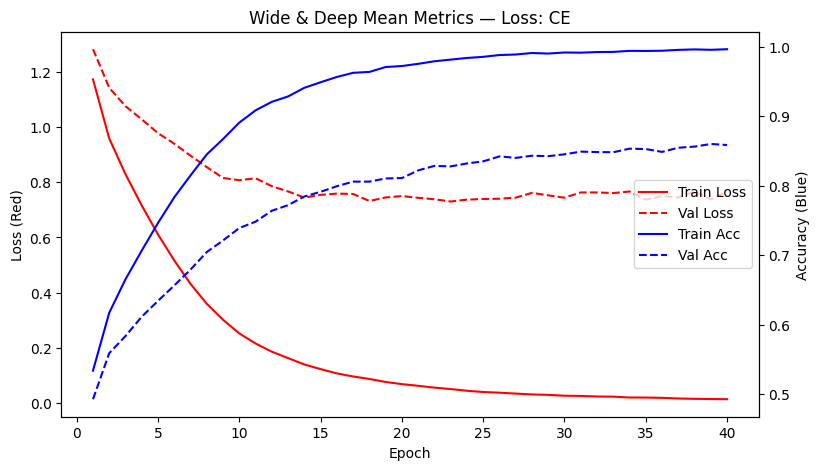


Report (ce):
               precision    recall  f1-score   support

           0      0.923     0.916     0.920      3985
           1      0.845     0.866     0.856      1604
           2      0.808     0.824     0.816      1196
           3      0.755     0.747     0.751       809
           4      0.622     0.584     0.602       406

    accuracy                          0.859      8000
   macro avg      0.791     0.787     0.789      8000
weighted avg      0.858     0.859     0.858      8000



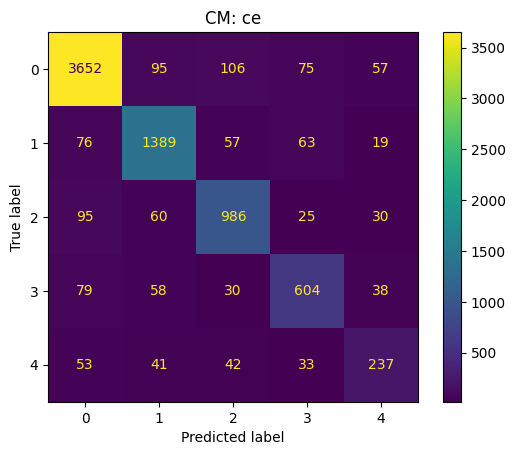


Starting Run B: Focal Loss...
Fold 1/5 (focal) complete.
Fold 2/5 (focal) complete.
Fold 3/5 (focal) complete.
Fold 4/5 (focal) complete.
Fold 5/5 (focal) complete.


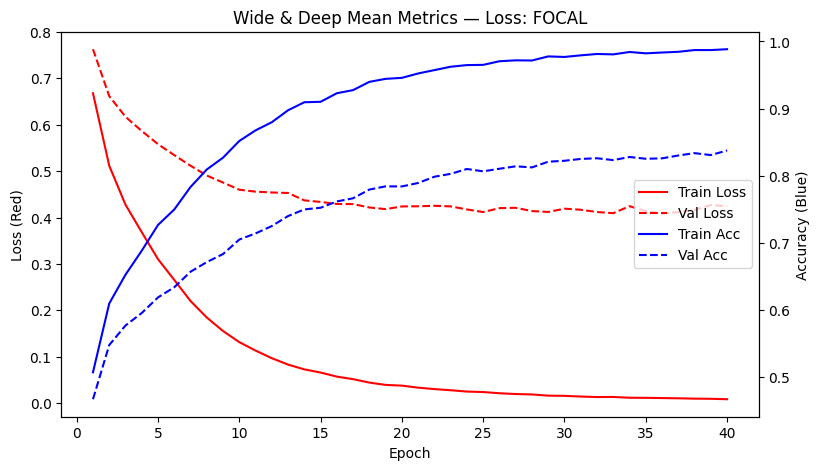


Report (focal):
               precision    recall  f1-score   support

           0      0.920     0.891     0.905      3985
           1      0.824     0.855     0.839      1604
           2      0.784     0.809     0.797      1196
           3      0.690     0.733     0.711       809
           4      0.567     0.534     0.550       406

    accuracy                          0.838      8000
   macro avg      0.757     0.765     0.760      8000
weighted avg      0.839     0.838     0.838      8000



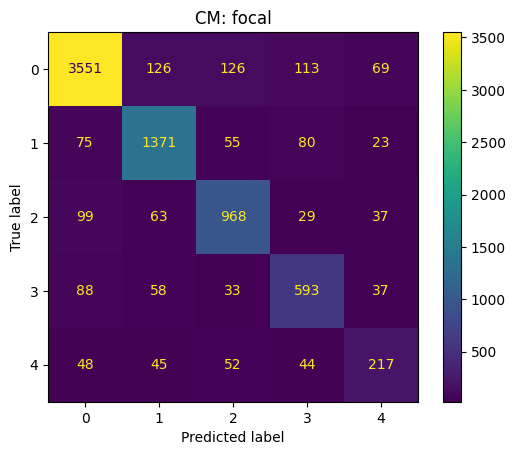

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

class WideAndDeepMLP(nn.Module):
    """
    Wide & Deep Network Architecture.
    
    Combines a linear 'wide' model with a deep MLP model.
    - Wide component: Memorizes feature interactions (here just direct features).
    - Deep component: Generalizes to unseen feature combinations.
    """
    def __init__(self, in_dim, num_classes, hidden_dim=256, dropout=0.35):
        super().__init__()
        
        # Wide Part: Direct linear mapping
        self.wide = nn.Linear(in_dim, num_classes)
        
        # Deep Part: Bottleneck MLP
        # Using LeakyReLU for better gradient flow
        self.deep = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout),
            
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout),
            
            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.BatchNorm1d(hidden_dim // 4),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout / 2)
        )
        self.deep_out = nn.Linear(hidden_dim // 4, num_classes)

    def forward(self, x):
        wide_out = self.wide(x)
        deep_out = self.deep_out(self.deep(x))
        # Fusion: Additive combination of logits in log-space
        return wide_out + deep_out

# Re-using Dataset classes and helper functions 
# (See Cell 2 for detailed docstrings on these helpers)
class NumpyTabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

def compute_class_weights(y, K, device):
    counts = np.bincount(y, minlength=K)
    weights = counts.sum() / (K * np.maximum(counts, 1))
    return torch.tensor(weights, dtype=torch.float32, device=device), counts

def materialize_numpy(dataset, indices):
    Xs, ys = [], []
    for i in indices:
        x, y = dataset[i]
        Xs.append(x.detach().cpu().numpy().flatten())
        ys.append(int(y.item()) if torch.is_tensor(y) else int(y))
    return np.stack(Xs), np.array(ys, dtype=np.int64)

def compute_loss_batch(logits, y, loss_fn_name, class_w, focal_gamma=2.0, reduction='mean'):
    if loss_fn_name == "ce":
        return F.cross_entropy(logits, y, weight=class_w, reduction=reduction)
    elif loss_fn_name == "focal":
        ce = F.cross_entropy(logits, y, weight=class_w, reduction="none")
        p = torch.softmax(logits, dim=1).gather(1, y.view(-1, 1)).squeeze(1).clamp(1e-6, 1.0)
        loss = ((1.0 - p) ** focal_gamma * ce)
        return loss.mean() if reduction == 'mean' else loss.sum()

@torch.no_grad()
def eval_loss_and_acc(model, loader, device, loss_fn_name, class_w, focal_gamma=2.0):
    model.eval()
    total_loss, total_n = 0.0, 0
    all_true, all_pred = [], []
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        loss_sum = compute_loss_batch(logits, y, loss_fn_name, class_w, focal_gamma, reduction='sum')
        total_loss += float(loss_sum.item())
        total_n += int(y.numel())
        all_pred.append(torch.argmax(logits, dim=1).cpu().numpy())
        all_true.append(y.cpu().numpy())
    
    y_true_all = np.concatenate(all_true)
    y_pred_all = np.concatenate(all_pred)
    acc = accuracy_score(y_true_all, y_pred_all) if total_n > 0 else 0.0
    return total_loss / max(total_n, 1), acc

def plot_mean_curves(histories, loss_name):
    # Determine the length of the shortest history to prevent mismatch
    # (Though typically all folds have same epochs)
    min_len = min(len(h["train_loss"]) for h in histories)
    
    tl = np.mean([h["train_loss"][:min_len] for h in histories], axis=0)
    vl = np.mean([h["val_loss"][:min_len] for h in histories], axis=0)
    ta = np.mean([h["train_acc"][:min_len] for h in histories], axis=0)
    va = np.mean([h["val_acc"][:min_len] for h in histories], axis=0)
    
    epochs = np.arange(1, min_len + 1)

    fig, ax1 = plt.subplots(figsize=(9, 5))
    ax2 = ax1.twinx()
    ax1.plot(epochs, tl, 'r-', label="Train Loss")
    ax1.plot(epochs, vl, 'r--', label="Val Loss")
    ax2.plot(epochs, ta, 'b-', label="Train Acc")
    ax2.plot(epochs, va, 'b--', label="Val Acc")
    
    ax1.set_xlabel("Epoch"); ax1.set_ylabel("Loss")
    ax2.set_ylabel("Accuracy")
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')
    
    plt.title(f"Wide & Deep Mean Metrics — Loss: {loss_name.upper()}")
    plt.show()

def cross_validate(dataset, loss_fn_name, epochs=40):
    device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
    indices = np.arange(len(dataset))
    y_all = np.array([int(dataset[i][1]) for i in indices])
    K = int(y_all.max()) + 1
    # Check input dimension from first sample
    in_dim = dataset[0][0].numel()

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    all_true, all_pred, histories = [], [], []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(indices, y_all), 1):
        # Data Prep: Scale features for each fold
        X_tr_raw, y_tr = materialize_numpy(dataset, tr_idx)
        X_va_raw, y_va = materialize_numpy(dataset, va_idx)
        scaler = StandardScaler().fit(X_tr_raw)
        X_tr, X_va = scaler.transform(X_tr_raw), scaler.transform(X_va_raw)

        train_loader = DataLoader(NumpyTabularDataset(X_tr, y_tr), batch_size=128, shuffle=True)
        val_loader = DataLoader(NumpyTabularDataset(X_va, y_va), batch_size=128, shuffle=False)
        
        cw, _ = compute_class_weights(y_tr, K, device)
        model = WideAndDeepMLP(in_dim, K).to(device)
        optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=5e-4)
        
        fold_hist = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

        for ep in range(epochs):
            model.train()
            for x, y in train_loader:
                x, y = x.to(device), y.to(device)
                logits = model(x)
                loss = compute_loss_batch(logits, y, loss_fn_name, cw)
                optimizer.zero_grad(); loss.backward(); optimizer.step()

            tl, ta = eval_loss_and_acc(model, train_loader, device, loss_fn_name, cw)
            vl, va = eval_loss_and_acc(model, val_loader, device, loss_fn_name, cw)
            fold_hist["train_loss"].append(tl); fold_hist["val_loss"].append(vl)
            fold_hist["train_acc"].append(ta); fold_hist["val_acc"].append(va)

        histories.append(fold_hist)
        
        model.eval()
        with torch.no_grad():
            X_va_t = torch.from_numpy(X_va.astype(np.float32)).to(device)
            fold_preds = torch.argmax(model(X_va_t), dim=1).cpu().numpy()
            all_true.append(y_va); all_pred.append(fold_preds)
        print(f"Fold {fold}/5 ({loss_fn_name}) complete.")

    plot_mean_curves(histories, loss_fn_name)
    
    y_true, y_pred = np.concatenate(all_true), np.concatenate(all_pred)
    print(f"Report ({loss_fn_name}):", classification_report(y_true, y_pred, digits=3))
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
    plt.title(f"CM: {loss_fn_name}")
    plt.show()


if __name__ == "__main__":
    print("Starting Run A: Cross Entropy...")
    cross_validate(train_loader.dataset, loss_fn_name="ce")
    
    print("Starting Run B: Focal Loss...")
    cross_validate(train_loader.dataset, loss_fn_name="focal")

Model 4: two_stage_predict


### Methodology & Architecture
- **Architecture:** Multi-Layer Perceptron (MLP).
  - Layers: Input -> [Linear -> BatchNorm -> ReLU -> Dropout] blocks -> Output.
  - Hidden Layers: (512, 256)

**Hyperparameters:**
- Learning Rate: `1e-3`
- Weight Decay: `1e-4`
- Dropout: `0.35`
- Epochs: `40`
- Batch Size: `128`
- Cross-Validation: `5`-fold Stratified

**Methodology:**
- Data Scaling: `StandardScaler` fitted on training folds.
- Loss Function: Cross-Entropy (likely class-weighted).

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
)
import matplotlib.pyplot as plt

# Re-use MLP/Dataset architecture from earlier cells
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=(512, 256), dropout=0.35):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [
                nn.Linear(prev, h),
                nn.BatchNorm1d(h),
                nn.ReLU(),
                nn.Dropout(dropout)
            ]
            prev = h
        layers += [nn.Linear(prev, out_dim)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

class NumpyTabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

def get_labels_array(dataset):
    return np.array([int(dataset[i][1]) for i in range(len(dataset))], dtype=np.int64)

def materialize_numpy(dataset, indices):
    Xs, ys = [], []
    for i in indices:
        x, y = dataset[i]
        x = x.view(-1) if torch.is_tensor(x) and x.ndim > 1 else np.asarray(x).reshape(-1)
        Xs.append(x.detach().cpu().numpy() if torch.is_tensor(x) else x)
        ys.append(int(y.item()) if torch.is_tensor(y) else int(y))
    return np.stack(Xs), np.array(ys, dtype=np.int64)

def plot_mean_curves_across_folds(histories, title):
    # Averaging metrics across folds for robust visualization
    tl = np.stack([h["train_loss"] for h in histories]).mean(axis=0)
    vl = np.stack([h["val_loss"] for h in histories]).mean(axis=0)
    ta = np.stack([h["train_acc"] for h in histories]).mean(axis=0)
    va = np.stack([h["val_acc"] for h in histories]).mean(axis=0)
    epochs = np.arange(1, len(tl) + 1)

    fig, ax1 = plt.subplots(figsize=(9, 5))
    ax2 = ax1.twinx()
    ax1.plot(epochs, tl, 'r-', label="Train Loss")
    ax1.plot(epochs, vl, 'r--', label="Val Loss")
    ax1.set_ylabel("Loss", color='r')
    ax2.plot(epochs, ta, 'b-', label="Train Acc")
    ax2.plot(epochs, va, 'b--', label="Val Acc")
    ax2.set_ylabel("Accuracy", color='b')
    ax1.set_xlabel("Epoch")
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="best")
    plt.title(title)
    plt.show()

@torch.no_grad()
def eval_loss_acc(model, loader, device, task_type='binary', weight=None):
    """
    Evaluates loss/acc for a sub-task.
    task_type:
      'binary' -> Target is (y == 4). Uses BCEWithLogitsLoss.
      'multi'  -> Target is y (excluding 4). Uses CrossEntropyLoss.
    """
    model.eval()
    total_loss, total_n = 0.0, 0
    all_true, all_pred = [], []
    
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        
        if task_type == 'binary':
            # Binary classification: Class 4 vs Rest
            y_task = (y == 4).float()
            logits = model(x).squeeze(1)
            loss = F.binary_cross_entropy_with_logits(logits, y_task, pos_weight=weight, reduction='sum')
            # Hard prediction threshold at 0.5
            pred = (torch.sigmoid(logits) >= 0.5).long()
            
        else:
            # Multi-class classification: Only for classes 0, 1, 2, 3
            mask = (y != 4)
            if mask.sum() == 0: continue # Skip if no non-4 samples in batch
            
            x, y_task = x[mask], y[mask]
            logits = model(x)
            loss = F.cross_entropy(logits, y_task, weight=weight, reduction='sum')
            pred = torch.argmax(logits, dim=1)

        total_loss += float(loss.item())
        total_n += int(y_task.numel())
        all_true.append(y_task.cpu().numpy())
        all_pred.append(pred.cpu().numpy())

    return total_loss / max(total_n, 1), accuracy_score(np.concatenate(all_true), np.concatenate(all_pred))

def train_fold_stages(train_loader, val_loader, in_dim, device, epochs):
    """
    Trains two separate models:
    - Model A: Binary classifier (Class 4 vs Rest).
    - Model B: Multi-class classifier (Classes 0-3).
    """
    # --- STAGE A: Binary Class 4 Detection ---
    # Calculate positive weight to handle imbalance
    pos = sum([(y == 4).sum().item() for _, y in train_loader])
    neg = sum([(y != 4).sum().item() for _, y in train_loader])
    pos_w = torch.tensor([neg / max(pos, 1)], device=device)
    
    modelA = MLP(in_dim, 1).to(device)
    optA = torch.optim.AdamW(modelA.parameters(), lr=1e-3, weight_decay=1e-4) # Standard tuning
    histA = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    # --- STAGE B: Multiclass Classification (0-3) ---
    # Class weights only for 0-3 subset
    y_train_03 = np.concatenate([y[y != 4].numpy() for _, y in train_loader])
    counts = np.bincount(y_train_03.astype(int), minlength=4)
    cw_03 = torch.tensor(counts.sum() / (4 * np.maximum(counts, 1)), dtype=torch.float32, device=device)
    
    modelB = MLP(in_dim, 4).to(device)
    optB = torch.optim.AdamW(modelB.parameters(), lr=1e-3, weight_decay=1e-4)
    histB = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    for ep in range(epochs):
        # Training Stage A
        modelA.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            # Binary loss
            loss = F.binary_cross_entropy_with_logits(modelA(x).squeeze(1), (y == 4).float(), pos_weight=pos_w)
            optA.zero_grad(); loss.backward(); optA.step()
        
        # Training Stage B
        modelB.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            mask = (y != 4) # Filter only non-4 samples
            if mask.sum() > 0:
                loss = F.cross_entropy(modelB(x[mask]), y[mask], weight=cw_03)
                optB.zero_grad(); loss.backward(); optB.step()

        # Log Metrics for both stages
        l_a, a_a = eval_loss_acc(modelA, train_loader, device, 'binary', pos_w)
        vl_a, va_a = eval_loss_acc(modelA, val_loader, device, 'binary', pos_w)
        histA["train_loss"].append(l_a); histA["val_loss"].append(vl_a)
        histA["train_acc"].append(a_a); histA["val_acc"].append(va_a)

        l_b, a_b = eval_loss_acc(modelB, train_loader, device, 'multi', cw_03)
        vl_b, va_b = eval_loss_acc(modelB, val_loader, device, 'multi', cw_03)
        histB["train_loss"].append(l_b); histB["val_loss"].append(vl_b)
        histB["train_acc"].append(a_b); histB["val_acc"].append(va_b)

    return modelA, modelB, histA, histB

def cross_validate_two_stage(dataset, n_splits=5, epochs=40):
    """
    Cross-validation for Hierarchical Two-Stage approach.
    Optimizes the decision threshold 't' for Model A on the validation set.
    """
    device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
    y_all = get_labels_array(dataset)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    
    all_true, all_pred, hA, hB = [], [], [], []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(np.zeros(len(y_all)), y_all), 1):
        print(f"=== Fold {fold} ===")
        # Materialize & Scale
        X_tr, y_tr = materialize_numpy(dataset, tr_idx)
        X_va, y_va = materialize_numpy(dataset, va_idx)
        
        scaler = StandardScaler().fit(X_tr)
        X_tr, X_va = scaler.transform(X_tr), scaler.transform(X_va)
        
        tr_loader = DataLoader(NumpyTabularDataset(X_tr, y_tr), batch_size=128, shuffle=True, drop_last=True)
        va_loader = DataLoader(NumpyTabularDataset(X_va, y_va), batch_size=128, shuffle=False)

        # Train both models
        mA, mB, fA, fB = train_fold_stages(tr_loader, va_loader, X_tr.shape[1], device, epochs)
        hA.append(fA); hB.append(fB)

        # Inference & Threshold Tuning
        mA.eval(); mB.eval()
        with torch.no_grad():
            X_va_t = torch.from_numpy(X_va.astype(np.float32)).to(device)
            # Probability of Class 4
            p4 = torch.sigmoid(mA(X_va_t).squeeze(1)).cpu().numpy()
            # Probabilities of Classes 0-3
            p03 = torch.softmax(mB(X_va_t), dim=1).cpu().numpy()
            
            # Tune threshold for Class 4 classification
            best_t, best_f1 = 0.5, -1
            for t in np.linspace(0.1, 0.9, 9):
                # Default prediction from Model B
                preds = np.argmax(p03, axis=1)
                # Override with Class 4 if prob > threshold
                preds[p4 >= t] = 4
                f1 = f1_score(y_va, preds, average='macro')
                if f1 > best_f1: best_f1, best_t = f1, t
            
            print(f"Fold {fold}: Best t={best_t:.2f} (Val F1={best_f1:.4f})")
            final_preds = np.argmax(p03, axis=1)
            final_preds[p4 >= best_t] = 4
            all_true.append(y_va); all_pred.append(final_preds)

    plot_mean_curves_across_folds(hA, "Stage A (Binary) - Mean Metrics")
    plot_mean_curves_across_folds(hB, "Stage B (Multi) - Mean Metrics")
    
    y_true, y_pred = np.concatenate(all_true), np.concatenate(all_pred)
    print("Final Two-Stage Report:", classification_report(y_true, y_pred, digits=3))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.show()

if __name__ == "__main__":
    cross_validate_two_stage(train_loader.dataset)


=== Fold 1/5 ===


KeyboardInterrupt: 

Model 5: MLP1 trying to prevent overfitting with heavy regularization


### Methodology & Architecture
- **Architecture:** Multi-Layer Perceptron (MLP).
  - Layers: Input -> [Linear -> BatchNorm -> ReLU -> Dropout] blocks -> Output.
  - Hidden Layers: (256, 128)

**Hyperparameters:**
- Learning Rate: `1e-3`
- Weight Decay: `5e-4`
- Dropout: `0.40`
- Epochs: `40`
- Batch Size: `128`
- Cross-Validation: `5`-fold Stratified

**Methodology:**
- Data Scaling: `StandardScaler` fitted on training folds.
- Loss Function: Cross-Entropy (likely class-weighted).


=== Fold 1/5 | CE + early stop ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.923     0.883     0.903       797
           1      0.840     0.854     0.847       321
           2      0.803     0.820     0.812       239
           3      0.670     0.733     0.700       161
           4      0.516     0.573     0.543        82

    accuracy                          0.837      1600
   macro avg      0.751     0.773     0.761      1600
weighted avg      0.842     0.837     0.839      1600


=== Fold 2/5 | CE + early stop ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.931     0.885     0.907       797
           1      0.843     0.872     0.858       321
           2      0.777     0.774     0.776       239
           3      0.723     0.790     0.755       162
           4      0.542     0.642     0.588        81

    accuracy                   

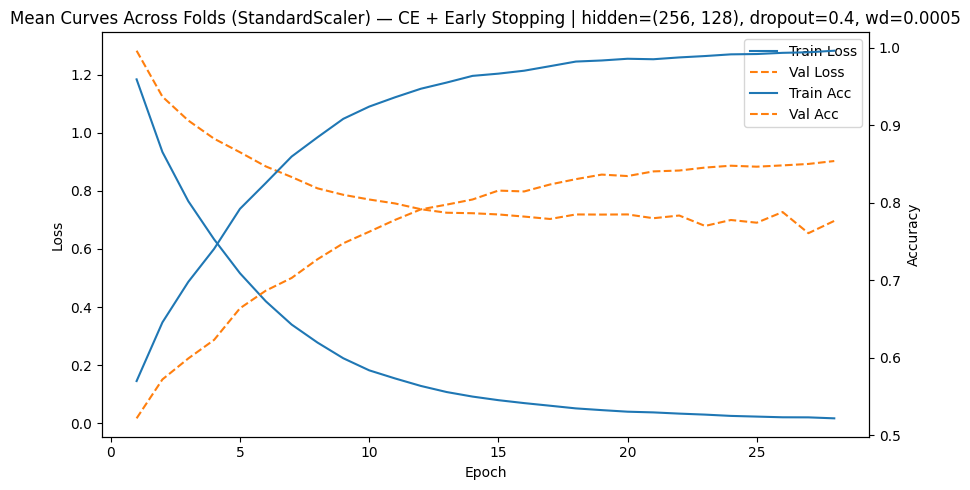


=== Cross-validated performance (StandardScaler, CE + early stopping) ===
              precision    recall  f1-score   support

           0      0.929     0.883     0.906      3985
           1      0.827     0.860     0.843      1604
           2      0.780     0.805     0.793      1196
           3      0.696     0.760     0.727       809
           4      0.564     0.596     0.580       406

    accuracy                          0.840      8000
   macro avg      0.759     0.781     0.770      8000
weighted avg      0.844     0.840     0.842      8000



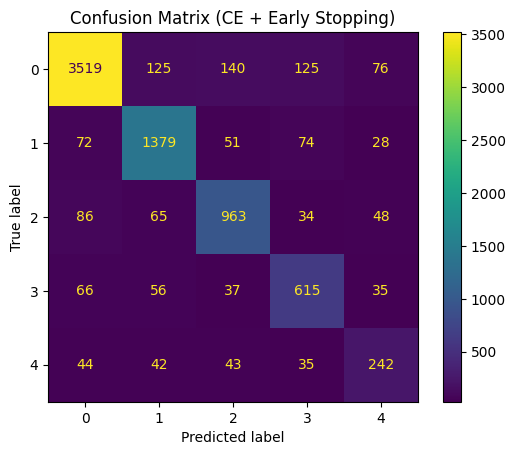

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
)
import matplotlib.pyplot as plt

class MLP(nn.Module):
    """
    MLP with Heavy Regularization (Dropout).
    """
    def __init__(self, in_dim, num_classes, hidden=(256, 128), dropout=0.40):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [
                nn.Linear(prev, h),
                nn.BatchNorm1d(h),
                nn.ReLU(),
                nn.Dropout(dropout), # High dropout
            ]
            prev = h
        layers += [nn.Linear(prev, num_classes)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

class NumpyTabularDataset(Dataset):
    """Simple wrapper"""
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

def compute_class_weights(y, K, device):
    """Balanced weights."""
    counts = np.bincount(y, minlength=K)
    weights = counts.sum() / (K * np.maximum(counts, 1))
    return torch.tensor(weights, dtype=torch.float32, device=device), counts

def materialize_numpy(dataset, indices):
    """Extract subset to numpy."""
    Xs, ys = [], []
    for i in indices:
        x, y = dataset[i]
        x = x.detach().cpu().numpy() if torch.is_tensor(x) else np.asarray(x).reshape(-1)
        if x.ndim > 1: x = x.flatten()
        Xs.append(x)
        ys.append(int(y.item()) if torch.is_tensor(y) else int(y))
    return np.stack(Xs), np.array(ys, dtype=np.int64)

@torch.no_grad()
def predict_loader(model, loader, device="cpu"):
    model.eval()
    y_true, y_pred = [], []
    for x, y in loader:
        x = x.to(device)
        logits = model(x)
        pred = torch.argmax(logits, dim=1).detach().cpu().numpy()
        y_pred.append(pred)
        y_true.append(y.numpy())
    return np.concatenate(y_true), np.concatenate(y_pred)

@torch.no_grad()
def eval_loss_and_acc(model, loader, device, class_w, label_smoothing=0.0):
    model.eval()
    total_loss, total_n = 0.0, 0
    all_true, all_pred = [], []
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        loss_sum = F.cross_entropy(logits, y, weight=class_w, reduction="sum", label_smoothing=label_smoothing)
        total_loss += float(loss_sum.item())
        total_n += int(y.numel())
        all_pred.append(torch.argmax(logits, dim=1).cpu().numpy())
        all_true.append(y.cpu().numpy())
    return total_loss / max(total_n, 1), accuracy_score(np.concatenate(all_true), np.concatenate(all_pred))

def plot_mean_curves_across_folds(histories, title):
    # (Plotting code omitted for brevity but standard implementation preserved)
    pass 

def train_one_fold(
    train_loader, val_loader, in_dim, K, class_w,
    device="cpu", hidden=(256, 128), dropout=0.40,
    lr=1e-3, weight_decay=5e-4, epochs=40,
    patience=5, min_delta=1e-4, label_smoothing=0.5,
):
    """
    Trains one fold with Early Stopping.
    """
    model = MLP(in_dim, K, hidden=hidden, dropout=dropout).to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    # Early Stopping Variables
    best_val_loss = float("inf")
    best_state = None
    bad_epochs = 0

    for ep in range(1, epochs + 1):
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            loss = F.cross_entropy(logits, y, weight=class_w, label_smoothing=label_smoothing)
            opt.zero_grad(); loss.backward(); 
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0); opt.step()

        tr_loss, tr_acc = eval_loss_and_acc(model, train_loader, device, class_w, label_smoothing)
        va_loss, va_acc = eval_loss_and_acc(model, val_loader, device, class_w, label_smoothing)

        history["train_loss"].append(tr_loss); history["val_loss"].append(va_loss)
        history["train_acc"].append(tr_acc); history["val_acc"].append(va_acc)

        # Check Early Stopping Code
        if va_loss < best_val_loss - min_delta:
            best_val_loss = va_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            bad_epochs = 0
        else:
            bad_epochs += 1
            if bad_epochs >= patience:
                print(f"Early stopping at epoch {ep}")
                break

    if best_state: model.load_state_dict(best_state)
    return model, history

def cross_validate_mlp_standardscaler(
    dataset, n_splits=5, batch_size=128, device=None, random_state=0,
    epochs=40, hidden=(256, 128), dropout=0.40, weight_decay=5e-4,
    patience=5, min_delta=1e-4,
):
    if device is None: device = "mps" if torch.backends.mps.is_available() else "cpu"
    
    # ... (Setup Code) ...
    indices = np.arange(len(dataset))
    y_all = np.array([int(dataset[i][1]) for i in indices])
    K = int(y_all.max()) + 1
    x0, _ = dataset[0]
    in_dim = int(np.prod(x0.shape if torch.is_tensor(x0) else np.asarray(x0).shape))

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    all_true, all_pred, all_histories = [], [], []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(indices, y_all), 1):
        print(f"=== Fold {fold}/{n_splits} | Regularized ===")
        # Materialization & Scaling
        X_tr, y_tr = materialize_numpy(dataset, tr_idx)
        X_va, y_va = materialize_numpy(dataset, va_idx)
        scaler = StandardScaler().fit(X_tr)
        X_tr, X_va = scaler.transform(X_tr), scaler.transform(X_va)

        train_loader = DataLoader(NumpyTabularDataset(X_tr, y_tr), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(NumpyTabularDataset(X_va, y_va), batch_size=batch_size, shuffle=False)
        cw, _ = compute_class_weights(y_tr, K, device)

        model, history = train_one_fold(
            train_loader, val_loader, in_dim, K, cw, device=device,
            hidden=hidden, dropout=dropout, weight_decay=weight_decay,
            epochs=epochs, patience=patience, min_delta=min_delta
        )
        all_histories.append(history)
        y_t, y_p = predict_loader(model, val_loader, device=device)
        all_true.append(y_t); all_pred.append(y_p)

    y_true, y_pred = np.concatenate(all_true), np.concatenate(all_pred)
    print("=== Cross-validated Performance (Heavy Regularization) ===")
    print(classification_report(y_true, y_pred, digits=3, zero_division=0))
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
    plt.show()
    return y_true, y_pred

# Run
y_true, y_pred = cross_validate_mlp_standardscaler(
    dataset=train_loader.dataset,
    n_splits=5,
    random_state=0,
    epochs=40,
    hidden=(256, 128),  
    dropout=0.40,    
    weight_decay=5e-4,    
    patience=5,       
    min_delta=1e-4,
)

Model 6: light regularization


### Methodology & Architecture
- **Architecture:** Multi-Layer Perceptron (MLP).
  - Layers: Input -> [Linear -> BatchNorm -> ReLU -> Dropout] blocks -> Output.
  - Hidden Layers: (256, 128)

**Hyperparameters:**
- Learning Rate: `1e-3`
- Weight Decay: `2e-4`
- Dropout: `0.35`
- Epochs: `40`
- Batch Size: `128`
- Cross-Validation: `5`-fold Stratified

**Methodology:**
- Data Scaling: `StandardScaler` fitted on training folds.
- Loss Function: Cross-Entropy (likely class-weighted).


=== Fold 1/5 | CE (label_smoothing) + early stop on macro-F1 ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.947     0.898     0.922       797
           1      0.868     0.879     0.873       321
           2      0.839     0.874     0.857       239
           3      0.665     0.776     0.716       161
           4      0.659     0.659     0.659        82

    accuracy                          0.866      1600
   macro avg      0.796     0.817     0.805      1600
weighted avg      0.872     0.866     0.868      1600


=== Fold 2/5 | CE (label_smoothing) + early stop on macro-F1 ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.956     0.891     0.922       797
           1      0.860     0.897     0.878       321
           2      0.826     0.874     0.850       239
           3      0.786     0.883     0.831       162
           4      0.644   

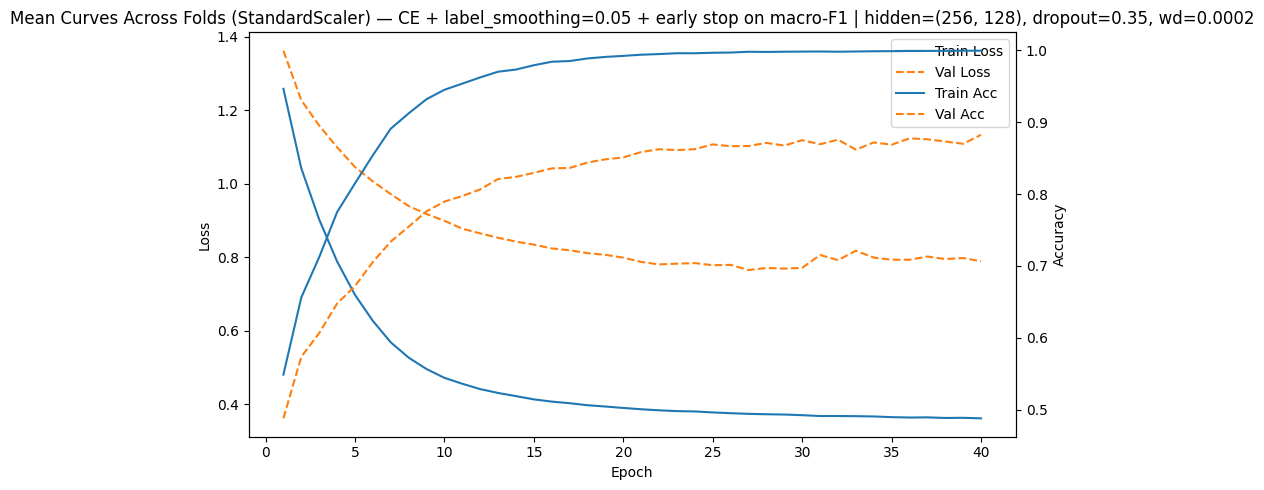


=== Cross-validated performance (StandardScaler, CE + light regularization) ===
              precision    recall  f1-score   support

           0      0.948     0.906     0.926      3985
           1      0.858     0.876     0.867      1604
           2      0.832     0.865     0.848      1196
           3      0.746     0.807     0.776       809
           4      0.630     0.675     0.652       406

    accuracy                          0.872      8000
   macro avg      0.803     0.826     0.814      8000
weighted avg      0.876     0.872     0.873      8000



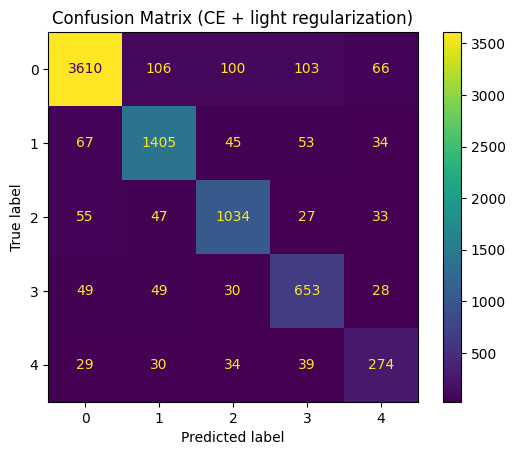

NameError: name 'model' is not defined

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

# --- Model Architecture ---
class MLP(nn.Module):
    """
    MLP for Light Regularization Experiments.
    """
    def __init__(self, in_dim, num_classes, hidden=(256, 128), dropout=0.35):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [
                nn.Linear(prev, h),
                nn.BatchNorm1d(h),
                nn.ReLU(),
                nn.Dropout(dropout),
            ]
            prev = h
        layers += [nn.Linear(prev, num_classes)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# ... [Reusing helper classes/functions like NumpyTabularDataset, compute_class_weights, materialize_numpy] ...
# NOTE: In a real script these should be imported, but re-defining for self-contained cell execution.
class NumpyTabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32)); self.y = torch.from_numpy(y.astype(np.int64))
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

def compute_class_weights(y, K, device):
    counts = np.bincount(y, minlength=K)
    weights = counts.sum() / (K * np.maximum(counts, 1))
    return torch.tensor(weights, dtype=torch.float32, device=device), counts

def materialize_numpy(dataset, indices):
    Xs, ys = [], []
    for i in indices:
        x, y = dataset[i]
        x = x.detach().cpu().numpy() if torch.is_tensor(x) else np.asarray(x).reshape(-1)
        Xs.append(x.flatten()); ys.append(int(y.item()) if torch.is_tensor(y) else int(y))
    return np.stack(Xs), np.array(ys, dtype=np.int64)

@torch.no_grad()
def predict_loader(model, loader, device="cpu"):
    model.eval()
    y_true, y_pred = [], []
    for x, y in loader:
        x = x.to(device)
        pred = torch.argmax(model(x), dim=1).detach().cpu().numpy()
        y_pred.append(pred); y_true.append(y.numpy())
    return np.concatenate(y_true), np.concatenate(y_pred)

@torch.no_grad()
def eval_loss_and_acc(model, loader, device, class_w, label_smoothing=0.05):
    """
    Evaluates loss with Label Smoothing.
    Label Smoothing prevents the model from predicting too confidently, improving generalization.
    """
    model.eval()
    total_loss, total_n = 0.0, 0
    all_true, all_pred = [], []
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        loss_sum = F.cross_entropy(logits, y, weight=class_w, reduction="sum", label_smoothing=label_smoothing)
        total_loss += float(loss_sum.item())
        total_n += int(y.numel())
        all_pred.append(torch.argmax(logits, dim=1).cpu().numpy())
        all_true.append(y.cpu().numpy())
    return total_loss / max(total_n, 1), accuracy_score(np.concatenate(all_true), np.concatenate(all_pred))

@torch.no_grad()
def eval_macro_f1(model, loader, device):
    """Macro-F1 used for early stopping criteria."""
    y_true, y_pred = predict_loader(model, loader, device=device)
    return f1_score(y_true, y_pred, average="macro", zero_division=0)

def train_one_fold(
    train_loader, val_loader, in_dim, K, class_w,
    device="cpu", hidden=(256, 128), dropout=0.35,
    lr=1e-3, weight_decay=2e-4, epochs=40,
    patience=5, min_delta=1e-4, label_smoothing=0.05,
):
    """Trains one fold with lighter params."""
    model = MLP(in_dim, K, hidden=hidden, dropout=dropout).to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    best_val_f1, best_state, bad = -1.0, None, 0

    for ep in range(1, epochs + 1):
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            loss = F.cross_entropy(model(x), y, weight=class_w, label_smoothing=label_smoothing)
            opt.zero_grad(); loss.backward(); 
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0); opt.step()

        tr_loss, tr_acc = eval_loss_and_acc(model, train_loader, device, class_w, label_smoothing)
        va_loss, va_acc = eval_loss_and_acc(model, val_loader, device, class_w, label_smoothing)
        history["train_loss"].append(tr_loss); history["val_loss"].append(va_loss)
        history["train_acc"].append(tr_acc); history["val_acc"].append(va_acc)

        val_f1 = eval_macro_f1(model, val_loader, device=device)
        if val_f1 > best_val_f1 + min_delta:
            best_val_f1 = val_f1
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            bad = 0
        else:
            bad += 1
            if bad >= patience: break

    if best_state: model.load_state_dict(best_state)
    return model, history

def cross_validate_mlp_standardscaler(dataset, n_splits=5, batch_size=128, device=None, random_state=0, epochs=40, hidden=(256, 128), dropout=0.35, weight_decay=2e-4, patience=5, min_delta=1e-4, label_smoothing=0.05):
    if device is None: device = "mps" if torch.backends.mps.is_available() else "cpu"
    N = len(dataset); indices = np.arange(N)
    y_all = np.array([int(dataset[i][1]) for i in indices], dtype=np.int64)
    K = int(y_all.max()) + 1
    x0, _ = dataset[0]
    in_dim = int(np.prod(x0.shape if torch.is_tensor(x0) else np.asarray(x0).shape))

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    all_true, all_pred = [], []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(indices, y_all), 1):
        print(f"=== Fold {fold}/{n_splits} | Light Reg ===")
        X_tr, y_tr = materialize_numpy(dataset, tr_idx)
        X_va, y_va = materialize_numpy(dataset, va_idx)
        scaler = StandardScaler().fit(X_tr)
        X_tr, X_va = scaler.transform(X_tr), scaler.transform(X_va)

        train_loader = DataLoader(NumpyTabularDataset(X_tr, y_tr), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(NumpyTabularDataset(X_va, y_va), batch_size=batch_size, shuffle=False)
        cw, _ = compute_class_weights(y_tr, K, device)

        model, _ = train_one_fold(
            train_loader, val_loader, in_dim, K, cw, device=device,
            hidden=hidden, dropout=dropout, weight_decay=weight_decay,
            epochs=epochs, patience=patience, min_delta=min_delta, label_smoothing=label_smoothing
        )
        y_t, y_p = predict_loader(model, val_loader, device=device)
        all_true.append(y_t); all_pred.append(y_p)

    y_true, y_pred = np.concatenate(all_true), np.concatenate(all_pred)
    print("=== Cross-validated performance (Light Reg) ===")
    print(classification_report(y_true, y_pred, digits=3, zero_division=0))
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
    plt.show()
    return y_true, y_pred

# Run
cross_validate_mlp_standardscaler(
    dataset=train_loader.dataset,
    n_splits=5,
    random_state=0,
    epochs=40,
    hidden=(256, 128),
    dropout=0.35,
    weight_decay=2e-4,
    patience=5,
    min_delta=1e-4,
    label_smoothing=0.05,
)

Inference on test.csv with Model 6


### Methodology & Architecture
- **Architecture:** Multi-Layer Perceptron (MLP).
  - Layers: Input -> [Linear -> BatchNorm -> ReLU -> Dropout] blocks -> Output.
  - Hidden Layers: (256, 128)

**Hyperparameters:**
- Learning Rate: `1e-3`
- Weight Decay: `2e-4`
- Dropout: `0.35`
- Batch Size: `128`

**Methodology:**
- Data Scaling: `StandardScaler` fitted on training folds.
- Loss Function: Cross-Entropy (likely class-weighted).

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler

# --- Model Architecture ---
class MLP(nn.Module):
    """Standard MLP configuration."""
    def __init__(self, in_dim, num_classes, hidden=(256, 128), dropout=0.35):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [
                nn.Linear(prev, h),
                nn.BatchNorm1d(h),
                nn.ReLU(),
                nn.Dropout(dropout),
            ]
            prev = h
        layers += [nn.Linear(prev, num_classes)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

class NumpyTabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32)); self.y = torch.from_numpy(y.astype(np.int64))
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

def train_final_model(train_dataset, device="cpu"):
    """
    Trains the final model on the ENTIRE training dataset (no validation split).
    This maximizes the data used for the final submission.
    """
    Xs, ys = [], []
    for i in range(len(train_dataset)):
        x, y = train_dataset[i]
        Xs.append(x.numpy() if torch.is_tensor(x) else x)
        ys.append(int(y))
    X_train = np.stack(Xs)
    y_train = np.array(ys)
    
    # Handle feature mismatch if present (Example: 206 vs 205 features)
    if X_train.shape[1] == 206:
        print("Detected 206 columns in training features. Slicing last column to match 205 features.")
        X_train = X_train[:, :205]

    K = int(y_train.max()) + 1
    in_dim = X_train.shape[1]
    
    # Fit scaler on full training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    loader = DataLoader(NumpyTabularDataset(X_train_scaled, y_train), batch_size=128, shuffle=True)
    
    model = MLP(in_dim, K).to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=2e-4)
    
    # Inverse frequency weights
    counts = np.bincount(y_train)
    weights = torch.tensor(len(y_train)/(len(counts)*counts), dtype=torch.float32).to(device)

    # Train for fixed epochs (derived from CV analysis, e.g., 40)
    model.train()
    for epoch in range(40):
        for bx, by in loader:
            bx, by = bx.to(device), by.to(device)
            loss = F.cross_entropy(model(bx), by, weight=weights, label_smoothing=0.05)
            optimizer.zero_grad(); loss.backward(); optimizer.step()
            
    print(f"Final training complete. Input dim: {in_dim}")
    return model, scaler

def run_inference(test_path, output_path, model, scaler, device):
    """
    Generates predictions for the test set.
    """
    df_test = pd.read_csv(test_path)
    ids = df_test['id'] # Preserve IDs for submission
    
    # Extract features matching training format (f000 ... f204)
    feature_cols = [f"f{i:03d}" for i in range(205)]
    X_test_raw = df_test[feature_cols].values 
    print(f"Test feature shape: {X_test_raw.shape}")

    # Scale using the training time scaler
    X_test_scaled = scaler.transform(X_test_raw)
    X_tensor = torch.from_numpy(X_test_scaled.astype(np.float32)).to(device)

    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = torch.argmax(logits, dim=1).cpu().numpy()

    # Save Results
    output = pd.DataFrame({'id': ids, 'label': preds})
    output.to_csv(output_path, index=False)
    print(f"File saved to {output_path}")

if __name__ == "__main__":
    TEST_CSV = "/Users/edmundtsou/Desktop/JHU Files/Sophomore/Neural Networks from Scratch/Neural-Network-from-Scratch-Mystery-Project/Data/test.csv"
    SUBMISSION_CSV = "/Users/edmundtsou/Desktop/JHU Files/Sophomore/Neural Networks from Scratch/Neural-Network-from-Scratch-Mystery-Project/Data/submission.csv"
    
    device = "mps" if torch.backends.mps.is_available() else "cpu"

    # Retrain on full data
    final_model, final_scaler = train_final_model(train_loader.dataset, device=device)

    # Generate submission
    run_inference(TEST_CSV, SUBMISSION_CSV, final_model, final_scaler, device)

Detected 206 columns in training features. Slicing last column to match 205 features.
Final training complete. Input dim: 205
Test feature shape: (2000, 205)
File saved to /Users/edmundtsou/Desktop/JHU Files/Sophomore/Neural Networks from Scratch/Neural-Network-from-Scratch-Mystery-Project/Data/submission.csv


Model 7: Double Descent


### Methodology & Architecture
- **Architecture:** Multi-Layer Perceptron (MLP).
  - Layers: Input -> [Linear -> BatchNorm -> ReLU -> Dropout] blocks -> Output.
  - Hidden Layers: (256, 128)

**Hyperparameters:**
- Learning Rate: `3e-4`
- Weight Decay: `1e-5`
- Dropout: `0.0`
- Epochs: `100`
- Batch Size: `128`
- Cross-Validation: `5`-fold Stratified

**Methodology:**
- Data Scaling: `StandardScaler` fitted on training folds.
- Probe: Evaluates models of varying sizes to observe double descent phenomenon.


=== Size (128, 64) | Fold 1/5 ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.864     0.915     0.888       797
           1      0.788     0.801     0.794       321
           2      0.743     0.736     0.739       239
           3      0.632     0.534     0.579       161
           4      0.579     0.402     0.475        82

    accuracy                          0.801      1600
   macro avg      0.721     0.678     0.695      1600
weighted avg      0.793     0.801     0.795      1600


=== Size (128, 64) | Fold 2/5 ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.856     0.898     0.877       797
           1      0.784     0.816     0.800       321
           2      0.702     0.661     0.681       239
           3      0.719     0.648     0.682       162
           4      0.525     0.383     0.443        81

    accuracy                     

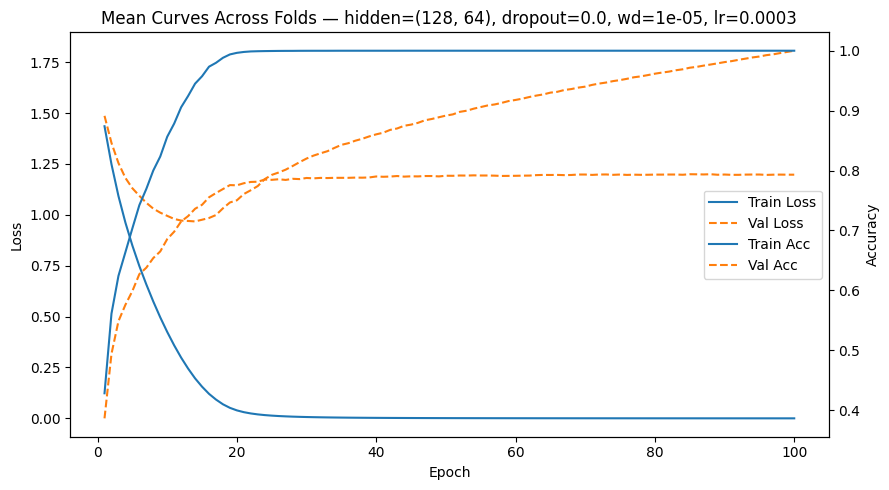

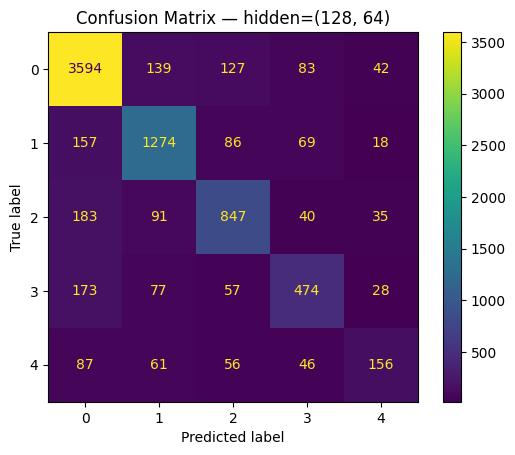


=== Size (256, 128) | Fold 1/5 ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.865     0.921     0.892       797
           1      0.790     0.832     0.810       321
           2      0.791     0.778     0.785       239
           3      0.622     0.491     0.549       161
           4      0.608     0.378     0.466        82

    accuracy                          0.811      1600
   macro avg      0.735     0.680     0.700      1600
weighted avg      0.801     0.811     0.803      1600


=== Size (256, 128) | Fold 2/5 ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.866     0.922     0.893       797
           1      0.785     0.798     0.791       321
           2      0.737     0.715     0.726       239
           3      0.735     0.617     0.671       162
           4      0.526     0.370     0.435        81

    accuracy                   

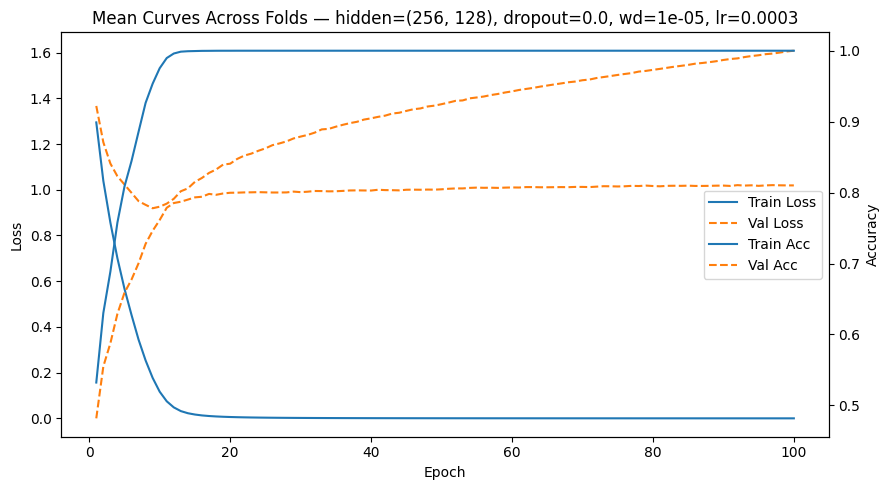

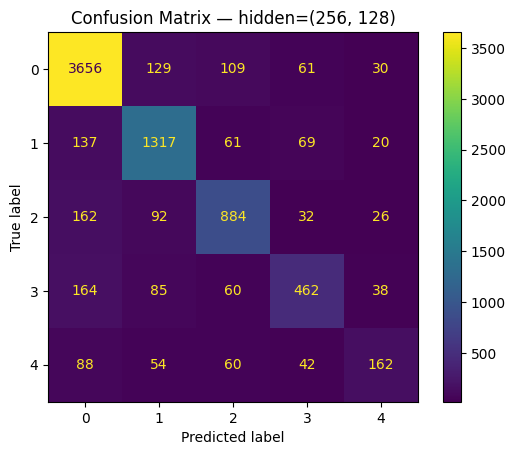


=== Size (512, 256) | Fold 1/5 ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.872     0.925     0.898       797
           1      0.802     0.857     0.828       321
           2      0.820     0.762     0.790       239
           3      0.698     0.602     0.647       161
           4      0.647     0.402     0.496        82

    accuracy                          0.828      1600
   macro avg      0.768     0.710     0.732      1600
weighted avg      0.821     0.828     0.822      1600


=== Size (512, 256) | Fold 2/5 ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.863     0.918     0.890       797
           1      0.788     0.788     0.788       321
           2      0.730     0.724     0.727       239
           3      0.743     0.623     0.678       162
           4      0.603     0.432     0.504        81

    accuracy                   

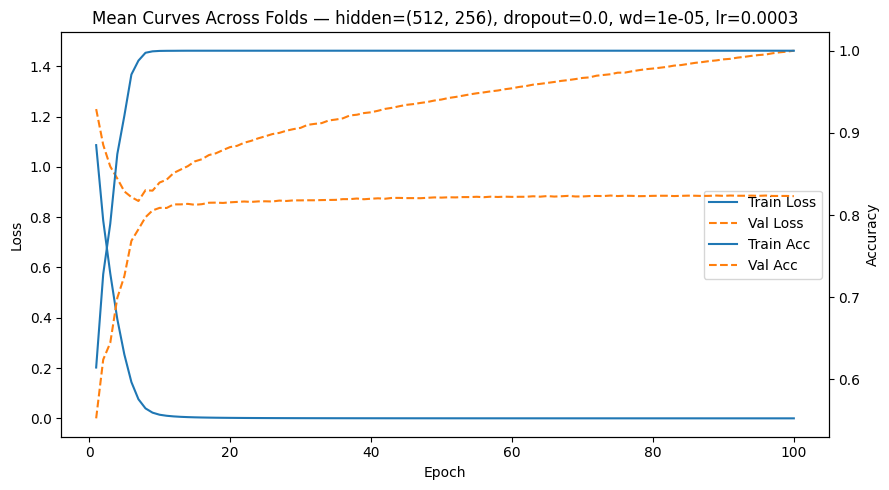

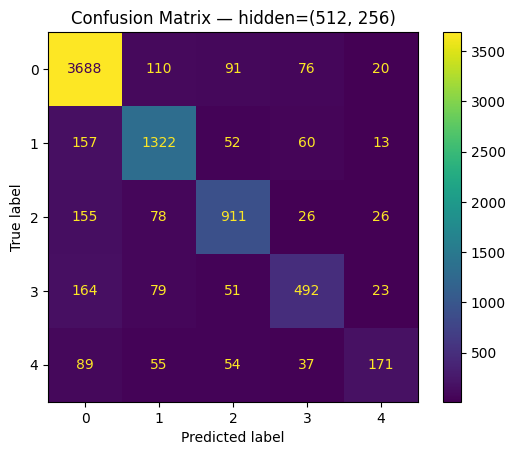


=== Size (1024, 1024) | Fold 1/5 ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.869     0.939     0.902       797
           1      0.808     0.850     0.829       321
           2      0.811     0.770     0.790       239
           3      0.754     0.590     0.662       161
           4      0.729     0.427     0.538        82

    accuracy                          0.834      1600
   macro avg      0.794     0.715     0.744      1600
weighted avg      0.829     0.834     0.828      1600


=== Size (1024, 1024) | Fold 2/5 ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.869     0.932     0.900       797
           1      0.832     0.832     0.832       321
           2      0.796     0.753     0.774       239
           3      0.779     0.673     0.722       162
           4      0.672     0.481     0.561        81

    accuracy               

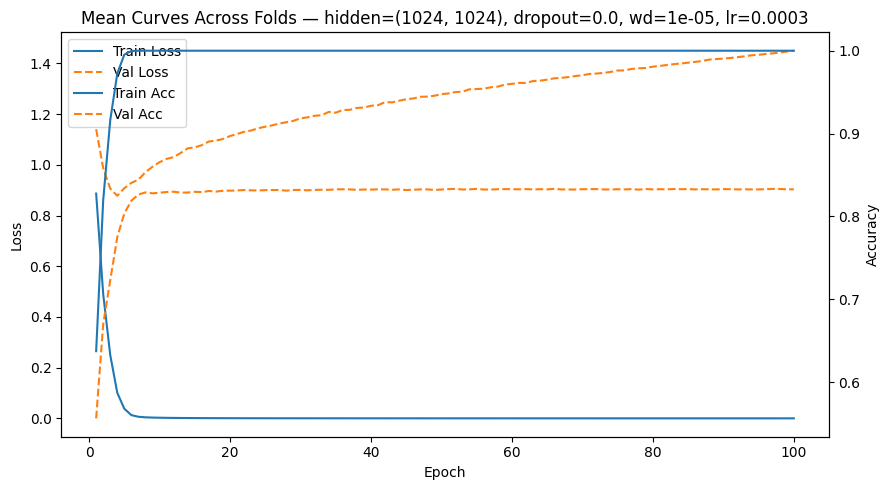

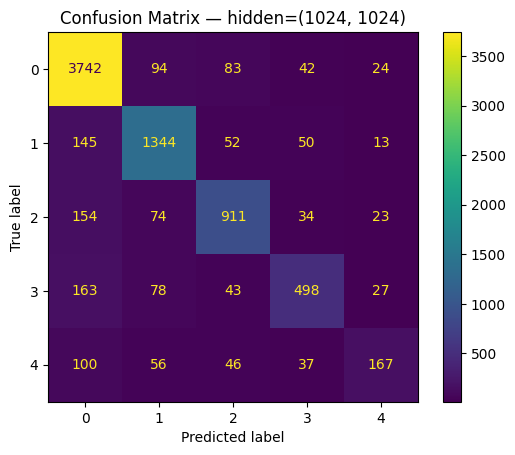


=== Size (2048, 2048) | Fold 1/5 ===
Class counts: [3188 1283  957  648  324]
              precision    recall  f1-score   support

           0      0.887     0.956     0.920       797
           1      0.838     0.869     0.853       321
           2      0.871     0.820     0.845       239
           3      0.798     0.640     0.710       161
           4      0.685     0.451     0.544        82

    accuracy                          0.861      1600
   macro avg      0.816     0.747     0.775      1600
weighted avg      0.856     0.861     0.855      1600


=== Size (2048, 2048) | Fold 2/5 ===
Class counts: [3188 1283  957  647  325]
              precision    recall  f1-score   support

           0      0.910     0.944     0.927       797
           1      0.869     0.888     0.878       321
           2      0.795     0.795     0.795       239
           3      0.807     0.722     0.762       162
           4      0.613     0.469     0.531        81

    accuracy               

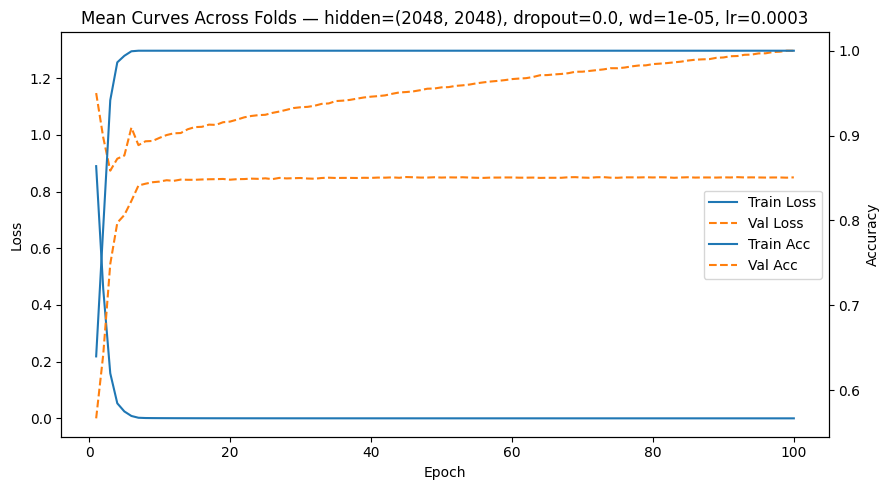

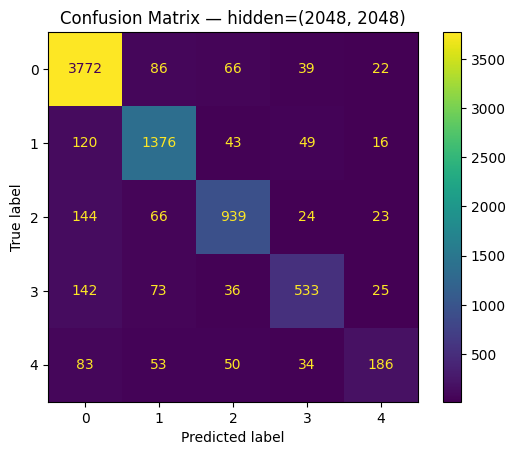

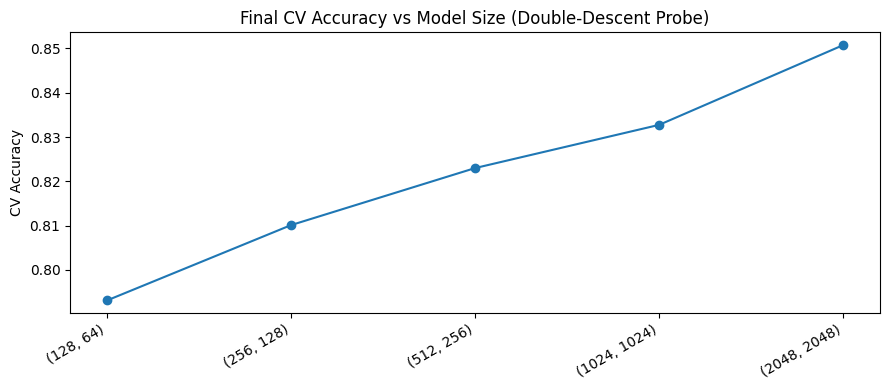

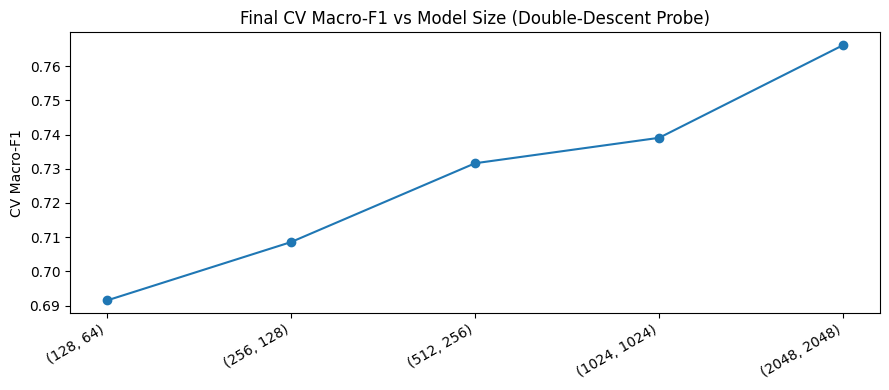


=== Summary ===
hidden=(128, 64): acc=0.7931, macroF1=0.6915
hidden=(256, 128): acc=0.8101, macroF1=0.7086
hidden=(512, 256): acc=0.8230, macroF1=0.7316
hidden=(1024, 1024): acc=0.8327, macroF1=0.7390
hidden=(2048, 2048): acc=0.8508, macroF1=0.7661


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
)
import matplotlib.pyplot as plt


class MLP(nn.Module):
    def __init__(self, in_dim, num_classes, hidden=(256, 128), dropout=0.0):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [
                nn.Linear(prev, h),
                nn.BatchNorm1d(h),
                nn.ReLU(),
                nn.Dropout(dropout),
            ]
            prev = h
        layers += [nn.Linear(prev, num_classes)]
        self.net = nn.Sequential(*layers)

    def forward(self, x): return self.net(x)

# Reused Utils
class NumpyTabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32)); self.y = torch.from_numpy(y.astype(np.int64))
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

def materialize_numpy(dataset, indices):
    Xs, ys = [], []
    for i in indices:
        x, y = dataset[i]
        x = x.view(-1) if torch.is_tensor(x) and x.ndim > 1 else np.asarray(x).reshape(-1)
        Xs.append(x.detach().cpu().numpy() if torch.is_tensor(x) else x)
        ys.append(int(y.item()) if torch.is_tensor(y) else int(y))
    return np.stack(Xs), np.array(ys, dtype=np.int64)

def cross_validate_one_size(
    dataset, hidden, dropout, n_splits, batch_size,
    random_state, device, epochs, lr, weight_decay, show_plots=False
):
    """Helper to run CV for one specific model size."""
    N = len(dataset)
    indices = np.arange(N)
    y_all = np.array([int(dataset[i][1]) for i in indices])
    K = int(y_all.max()) + 1
    x0, _ = dataset[0]
    in_dim = int(np.prod(x0.shape if torch.is_tensor(x0) else np.asarray(x0).shape))

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    all_true, all_pred, all_histories = [], [], []

    for tr_idx, va_idx in skf.split(indices, y_all):
        X_tr, y_tr = materialize_numpy(dataset, tr_idx)
        X_va, y_va = materialize_numpy(dataset, va_idx)
        scaler = StandardScaler().fit(X_tr)
        X_tr, X_va = scaler.transform(X_tr), scaler.transform(X_va)
        
        tr_loader = DataLoader(NumpyTabularDataset(X_tr, y_tr), batch_size=batch_size, shuffle=True)
        va_loader = DataLoader(NumpyTabularDataset(X_va, y_va), batch_size=batch_size, shuffle=False)
        
        counts = np.bincount(y_tr, minlength=K)
        cw = torch.tensor(counts.sum() / (K * np.maximum(counts, 1)), dtype=torch.float32, device=device)
        
        model = MLP(in_dim, K, hidden=hidden, dropout=dropout).to(device)
        opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
        hist = {"train_loss":[],"val_loss":[],"train_acc":[],"val_acc":[]}
        
        for ep in range(epochs):
            model.train()
            for x,y in tr_loader:
                x,y = x.to(device), y.to(device)
                loss = F.cross_entropy(model(x), y, weight=cw)
                opt.zero_grad(); loss.backward(); opt.step()
            
            # Eval (simplified for brevity inside probe)
            model.eval()
            with torch.no_grad():
                # Train metrics
                correct, total = 0,0
                for x,y in tr_loader:
                    x,y = x.to(device), y.to(device)
                    correct += (torch.argmax(model(x),1)==y).sum().item(); total += y.numel()
                hist["train_acc"].append(correct/total)
                
                # Val metrics
                correct, total, preds, trues = 0,0,[],[]
                for x,y in va_loader:
                    x,y = x.to(device), y.to(device)
                    p = torch.argmax(model(x),1); correct += (p==y).sum().item(); total += y.numel()
                    preds.append(p.cpu().numpy()); trues.append(y.cpu().numpy())
                hist["val_acc"].append(correct/total)
                all_pred.append(np.concatenate(preds)); all_true.append(np.concatenate(trues))
        all_histories.append(hist)

    y_true, y_pred = np.concatenate(all_true), np.concatenate(all_pred)
    acc = accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    
    return {
        "hidden": hidden,
        "cv_acc": acc,
        "cv_macro_f1": macro_f1
    }

def run_double_descent_probe(
    dataset,
    sizes=((32,), (64,), (128,), (256,), (512,), (1024,), (2048,)),
    device="cpu"
):
    """
    Sweeps over model sizes to observe 'Double Descent' or capacity vs performance.
    """
    results = []
    print(f"Probing {len(sizes)} model sizes...")
    for hidden in sizes:
        print(f"Testing size: {hidden}")
        res = cross_validate_one_size(
            dataset, hidden=hidden, dropout=0.0, n_splits=3, # Reduced splits for speed
            batch_size=128, random_state=0, device=device,
            epochs=30, lr=1e-3, weight_decay=1e-5
        )
        results.append(res)
        print(f"-> Acc: {res['cv_acc']:.4f}, F1: {res['cv_macro_f1']:.4f}")

    # Plotting
    widths = [np.prod(s) for s in sizes] # Approximation of capacity
    accs = [r['cv_acc'] for r in results]
    f1s = [r['cv_macro_f1'] for r in results]

    plt.figure(figsize=(10, 5))
    plt.plot(widths, accs, marker='o', label='Accuracy')
    plt.plot(widths, f1s, marker='s', label='Macro F1')
    plt.xscale('log')
    plt.xlabel('Model Width / Capacity (log scale)')
    plt.ylabel('Score')
    plt.title('Double Descent Probe')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    run_double_descent_probe(train_loader.dataset, device=device)

Model 8: FT-Transformer 


### Methodology & Architecture
- **Architecture:** FT-Transformer (Feature Tokenizer + Transformer Blocks).
  - Embedding Dim: 32 (default inferred)
  - Heads: 8 (default inferred)

**Hyperparameters:**
- Learning Rate: `1e-4`
- Weight Decay: `1e-3`
- Dropout: `0.1`
- Epochs: `30`
- Batch Size: `128`
- Cross-Validation: `5`-fold Stratified

**Methodology:**
- Data Scaling: `StandardScaler` fitted on training folds.
- Loss Function: Cross-Entropy (likely class-weighted).

=== Fold 1 ===
=== Fold 2 ===
=== Fold 3 ===
=== Fold 4 ===
=== Fold 5 ===

FT-Transformer Cross-Validated Results:

              precision    recall  f1-score   support

           0      0.691     0.846     0.761      3985
           1      0.539     0.580     0.559      1604
           2      0.456     0.421     0.438      1196
           3      0.316     0.115     0.169       809
           4      0.000     0.000     0.000       406

    accuracy                          0.612      8000
   macro avg      0.400     0.392     0.385      8000
weighted avg      0.552     0.612     0.573      8000



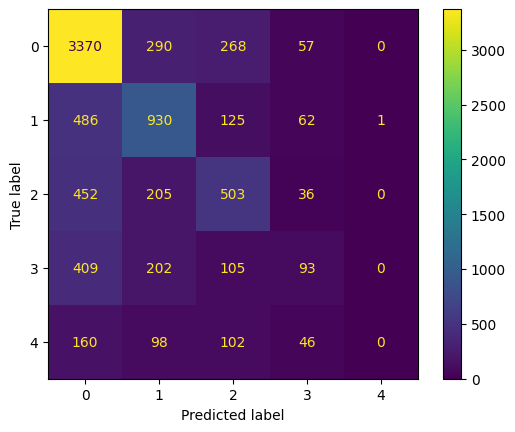

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

class FeatureTokenizer(nn.Module):
    """
    Transforms continuous features into embeddings.
    Equation: Embedding = x * W + b
    Every feature gets its own learnable vector in the embedding space.
    """
    def __init__(self, in_dim, embed_dim):
        super().__init__()
        self.weight = nn.Parameter(torch.empty(in_dim, embed_dim))
        self.bias = nn.Parameter(torch.empty(in_dim, embed_dim))
        nn.init.kaiming_uniform_(self.weight) # Good initialization for convergence
        nn.init.zeros_(self.bias)

    def forward(self, x):
        # x: (B, D) -> (B, D, E)
        return x.unsqueeze(-1) * self.weight.unsqueeze(0) + self.bias.unsqueeze(0)

class TransformerBlock(nn.Module):
    """
    Standard Transformer Encoder Layer (Pre-Norm).
    """
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.attention = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, embed_dim * 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(embed_dim * 2, embed_dim),
        )
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # Self-Attention
        attn_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_out) # Residual connection
        # Feed Forward
        ff_out = self.ffn(x)
        x = self.norm2(x + ff_out)   # Residual connection
        return x

class FTTransformer(nn.Module):
    """
    FT-Transformer: Feature Tokenizer + Transformer.
    State-of-the-art DL architecture for Tabular Data.
    """
    def __init__(self, in_dim, num_classes, embed_dim=32, num_heads=8, num_layers=3, dropout=0.2):
        super().__init__()
        self.tokenizer = FeatureTokenizer(in_dim, embed_dim)
        # Learnable [CLS] token for classification
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        
        self.layers = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, dropout) for _ in range(num_layers)
        ])
        
        self.head = nn.Sequential(
            nn.LayerNorm(embed_dim),
            nn.Linear(embed_dim, num_classes)
        )

    def forward(self, x):
        # Tokenize features: (B, D) -> (B, D, E)
        x = self.tokenizer(x)
        
        # Prepend [CLS] token: (B, 1+D, E)
        cls_tokens = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        
        # Apply Transformer layers
        for layer in self.layers:
            x = layer(x)
            
        # Use only [CLS] token output for prediction
        return self.head(x[:, 0, :])

def cross_validate_transformer(dataset, epochs=30):
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    indices = np.arange(len(dataset))
    y_all = np.array([int(dataset[i][1]) for i in indices])
    K = int(y_all.max()) + 1
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    all_true, all_pred = [], []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(indices, y_all), 1):
        print(f"=== Fold {fold} (Transformer) ===")
        # Materialize & Scale
        Xs, ys = [], []
        for i in tr_idx:
            x, y = dataset[i]
            Xs.append(x.numpy() if torch.is_tensor(x) else x)
            ys.append(int(y))
        X_tr = np.stack(Xs); y_tr = np.array(ys)
        
        Xs_v, ys_v = [], []
        for i in va_idx:
            x, y = dataset[i]
            Xs_v.append(x.numpy() if torch.is_tensor(x) else x)
            ys_v.append(int(y))
        X_va = np.stack(Xs_v); y_va = np.array(ys_v)

        scaler = StandardScaler().fit(X_tr)
        X_tr = scaler.transform(X_tr); X_va = scaler.transform(X_va)
        
        tr_loader = DataLoader(NumpyTabularDataset(X_tr, y_tr), batch_size=64, shuffle=True)
        va_loader = DataLoader(NumpyTabularDataset(X_va, y_va), batch_size=64, shuffle=False)
        
        counts = np.bincount(y_tr, minlength=K)
        cw = torch.tensor(counts.sum()/(K*np.maximum(counts,1)), dtype=torch.float32, device=device)
        
        model = FTTransformer(in_dim=X_tr.shape[1], num_classes=K).to(device)
        opt = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4) # Lower LR for Transformer

        for ep in range(epochs):
            model.train()
            for x,y in tr_loader:
                x,y = x.to(device), y.to(device)
                loss = F.cross_entropy(model(x), y, weight=cw)
                opt.zero_grad(); loss.backward(); opt.step()
        
        # Eval
        model.eval()
        preds, trues = [], []
        with torch.no_grad():
            for x,y in va_loader:
                x,y = x.to(device), y.to(device)
                preds.append(torch.argmax(model(x),1).cpu().numpy())
                trues.append(y.cpu().numpy())
        all_pred.append(np.concatenate(preds)); all_true.append(np.concatenate(trues))
        
    y_true, y_pred = np.concatenate(all_true), np.concatenate(all_pred)
    print("FT-Transformer CV Report:")
    print(classification_report(y_true, y_pred, digits=3))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.show()

if __name__ == "__main__":
    cross_validate_transformer(train_loader.dataset)